Grab data from AWS CloudWatch Log Insights 

```
fields @timestamp, @duration
| filter @duration > 0
| sort @duration desc
| limit 10000
```

In [126]:
import datetime

# our data is going to be array of time slices with an array of bins inside
bin_step = 100 # milliseconds
max_bin = 30000 # milliseconds
bin_limits = [x for x in range(bin_step, max_bin, bin_step)]
template_bin = [0 for x in range(int(max_bin/bin_step))]


time_offset = (datetime.datetime.fromisoformat("2021-08-12 16:38:57.526")- datetime.datetime(1970, 1, 1)).total_seconds()
time_interval = 120 #seconds
time_frame = 720 # minutes

rows = [ template_bin[:] for _ in range(0,int(time_frame*60/time_interval)) ] # build an empty array

len(rows)

360

In [128]:
# ok now we need to read the csv file, for each row of the csv file work out which time row it should go into and which bin (column)

import csv
csv_file = open('logs-insights-results-3.csv', 'r')
reader = csv.reader(csv_file)
next(reader, None) # ignore header row
for row in reader:
    seconds = (datetime.datetime.fromisoformat(row[0])- datetime.datetime(1970, 1, 1)).total_seconds()
    seconds = time_offset - seconds
    hours = int(hours)
    seconds = seconds + minutes*60 + hours*60*60
    duration = int(float(row[1]))
    time_bucket = int(seconds/time_interval)
    duration_bucket = int((duration / bin_step))
    if duration_bucket > int(max_bin/bin_step):
        duration_bucket = int(max_bin/bin_step)
    rows[time_bucket][duration_bucket-1] += 1 #increment the counter for the bin in the time slice

In [130]:
rows[0]

[0,
 56,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 2,
 4,
 6,
 4,
 6,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 4,
 2,
 4,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

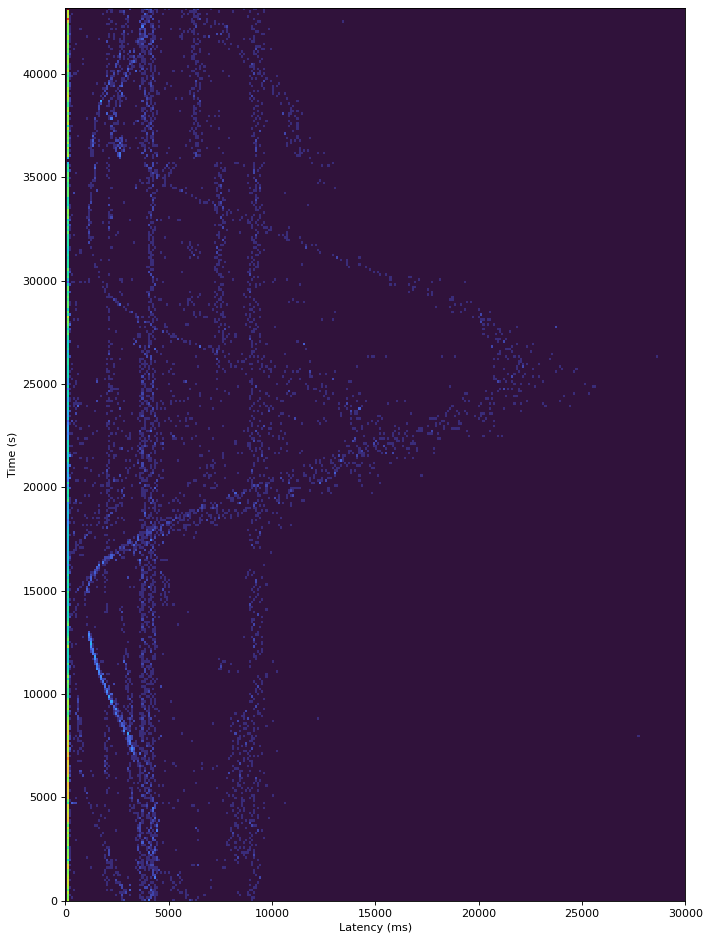

In [131]:
plot = None
import matplotlib.pyplot as plot
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker

import numpy as np

#plot.plot(rows)
plot.figure(figsize=(10, 30), dpi=80)

plot.xlabel('Latency (ms)')

plot.ylabel('Time (s)')



data = np.array(rows)
#norm = LogNorm(data.mean() + 0.5 * data.std(), data.max(), clip='False')
plot.imshow(data, cmap='turbo', interpolation='nearest',extent=[0,max_bin,0,time_frame*60])
 